In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

## Q1
a) Plot function

In [3]:
#import the dataset
w3_classif = pd.read_csv('w3classif.csv', header=None)
w3_classif = w3_classif.rename(columns={0: "x1", 1: "x2", 2:'y'})

#classify our x and y
X = w3_classif[['x1', 'x2']]
y = w3_classif['y']

#Create a dictionary to store our data

#save multiple test-train sets
def testing(split_pct):

        sets = {'X_train': [],
        'X_test': [],
        'y_train': [],
        'y_test': []}

        for i in range(10): 
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_pct)
                sets['X_train'].append(X_train)
                sets['X_test'].append(X_test)
                sets['y_train'].append(y_train)
                sets['y_test'].append(y_test)
        return sets

sets = testing(0.3)

## Q2)
Calculate the training and test errors over all the datasets

In [21]:
def accuracy_scores(k, sets):    
    misclassif_test_10 = []
    misclassif_train_10 = []
    MSE_train_10 = []
    MSE_test_10 = []

    for i in range(10):
        
        clf = KNeighborsClassifier(k).fit(sets['X_train'][i], sets['y_train'][i])

        y_test = sets['y_test'][i]
        y_train = sets['y_train'][i]
        y_pred_test = clf.predict(sets['X_test'][i])
        y_pred_train = clf.predict(sets['X_train'][i])
        
        misclassif_test_10.append(round(1 - accuracy_score(y_test, y_pred_test), 5))
        misclassif_train_10.append(round(1 - accuracy_score(y_train, y_pred_train), 5))
        MSE_test_10.append(round(np.mean((y_pred_test - y_test) ** 2), 5))
        MSE_train_10.append(round(np.mean((y_train - y_pred_train) ** 2), 5))
        
        # train_loss = np.mean((clf.predict(X_train2.to_numpy().reshape(-1,1)) - y_train2) ** 2)
    return MSE_test_10, misclassif_test_10, MSE_train_10, misclassif_train_10
#observe that these are both the same

MSE_test_10, misclassif_test_10, MSE_train_10, misclassif_train_10 = accuracy_scores(3, sets)
print(f"average mean squared error: {np.average(MSE_test_10)}")
print(f"average misclassification rate: {np.average(misclassif_test_10)}")

average mean squared error: 0.039166
average misclassification rate: 0.039166


plot the test loss and train loss

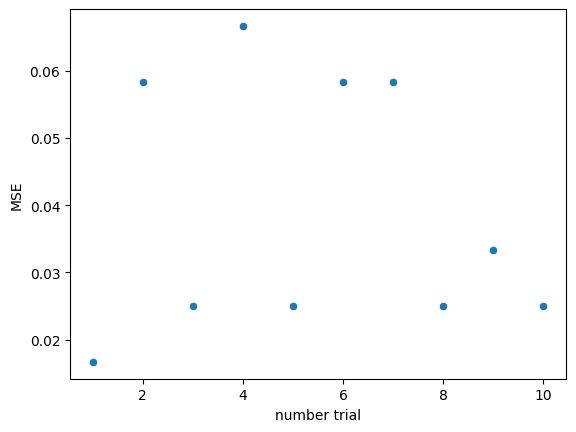

In [22]:
classification = pd.DataFrame(misclassif_test_10, columns=['MSE'])
classification = classification.reset_index() #add index
classification['index'] = classification['index'] + 1

sns.scatterplot(data=classification, x='index', y='MSE')
plt.xlabel("number trial")
plt.show()


## Q3 
#### Repeat Q1 and Q2 but with a different split - both 50/50 and 90/10

In [24]:
sets_50_50 = testing(0.50)
sets_90_10 = testing(0.90)

MSE_test_5050, misclassif_test_5050, MSE_train_5050, misclassif_train_5050 = accuracy_scores(3, sets_50_50)

print("50/50 split:")
print(MSE_test_5050)
print(f"average mean squared error: {np.average(MSE_test_5050)}")

MSE_test_9010, misclassif_test_9010, MSE_train_9010, misclassif_train_9010 = accuracy_scores(3, sets_90_10)

print("90/10 split:")
print(MSE_test_9010)
print(f"average mean squared error: {np.average(MSE_test_9010)}")

#ans: it seems that the 50/50 split is about the same as the 30/70, but the 90/10 has larger 
#misclassification errors

50/50 split:
[0.04, 0.055, 0.09, 0.04, 0.045, 0.035, 0.05, 0.035, 0.045, 0.04]
average mean squared error: 0.0475
90/10 split:
[0.04722, 0.04722, 0.05556, 0.075, 0.04444, 0.03889, 0.05, 0.04722, 0.03611, 0.04444]
average mean squared error: 0.048609999999999993


## Q4) 
Calculate the standard deviation of your training and test error values over the 10 trials from Q2 and Q3

In [37]:
#also use the cross validation score:
print(f"standard deviation of the 30% testing data split: {round(np.asarray(misclassif_test_10).std(), 3)}")
print(f"standard deviation of the 50% testing data split: {round(np.asarray(MSE_test_5050).std(), 3)}")
print(f"standard deviation of the 90% testing data split: {round(np.asarray(MSE_test_9010).std(), 3)}")
print(f"standard deviation of the training data with a 30/70 split: {round(np.asarray(misclassif_train_10).std(), 3)}")
print(f"standard deviation of the training data with a 50/50 split: {round(np.asarray(MSE_train_5050).std(), 3)}")
print(f"standard deviation of the training data with a 90/10 split: {round(np.asarray(MSE_train_9010).std(), 3)}")

print(f"MEAN of the 30% testing data split: {round(np.asarray(misclassif_test_10).mean(), 3)}")
print(f"MEAN of the 50% testing data split: {round(np.asarray(MSE_test_5050).mean(), 3)}")
print(f"MEAN of the 90% testing data split: {round(np.asarray(MSE_test_9010).mean(), 3)}")
print(f"MEAN of the training data with a 30/70 split: {round(np.asarray(misclassif_train_10).mean(), 3)}")
print(f"MEAN of the training data with a 50/50 split: {round(np.asarray(MSE_train_5050).mean(), 3)}")
print(f"MEAN of the training data with a 90/10 split: {round(np.asarray(MSE_train_9010).mean(), 3)}")

standard deviation of the 30% testing data split: 0.018
standard deviation of the 50% testing data split: 0.015
standard deviation of the 90% testing data split: 0.01
standard deviation of the training data with a 30/70 split: 0.006
standard deviation of the training data with a 50/50 split: 0.01
standard deviation of the training data with a 90/10 split: 0.021
MEAN of the 30% testing data split: 0.039
MEAN of the 50% testing data split: 0.048
MEAN of the 90% testing data split: 0.049
MEAN of the training data with a 30/70 split: 0.028
MEAN of the training data with a 50/50 split: 0.026
MEAN of the training data with a 90/10 split: 0.028


The standard deviation for the testing data is greater for the 30/70 split, but the standard deviation for the training data prediction is also significantly lower compared to the 50/50 split.

This follows what was outlined in the textbook; as the proportion of training data increases, the error of the training data also increases (due to not being able to fit all the data as well to the model) but the stddev of the test error decreases as the training proportion increases

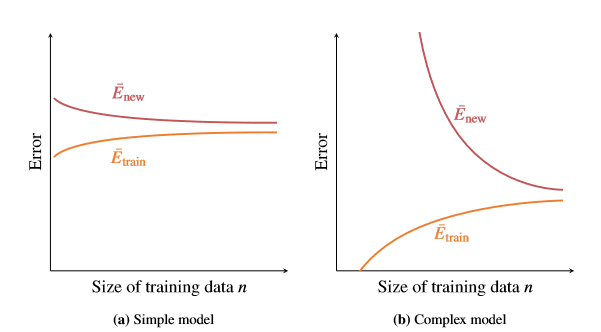

## Q5) Perform a 10-fold cross validation using the model and original dataset
observe the mean and standard devaitions of the cross validation error

In [34]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(3)

scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print(f"Std of scores: {round(np.asarray(scores).std(), 4)}")
print(f"mean of scores: {round(np.asarray(scores).mean(), 4)}")

[0.95  0.975 0.95  1.    0.925 1.    1.    0.925 0.95  0.9  ]
Std of scores: 0.0336
mean of scores: 0.9575
